In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('SlowRateSDN/LR-HR DDoS 2024 Dataset for SDN-Based Networks.csv')

In [6]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: [] 



,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Label
0,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
1,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
2,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
3,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
4,218,6,46004,80,246238678,29823,8,2556,5188,700.40217,...,100,160,441000.7473,0,0,0,693.692308,-1,64240,0


In [7]:
data.columns

Index(['flow_duration', 'protocol', 'srcport', 'dstport', 'byte_count',
       'packet_count', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Std', 'Flow Pkts/s', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'Pkt Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Label'],
      dtype='object')

In [8]:
data['Label'].value_counts()

0    42890
1      987
Name: Label, dtype: int64

In [9]:
# changing attack labels to their respective attack class
#def change_label(df):
    #df['Label'].replace(['Hulk-Reqtimeout','Hulk-NoDefense','Hulk-Security2','Hulk-Evasive','TCPFlood-Reqtimeout','TCPFlood-Evasive','TCPFlood-Security2','TCPFlood-NoDefense','Slowloris-Reqtimeout','Slowhttptest-Security2',
    #                     'Slowhttptest-Evasive','Slowhttptest-NoDefense','Slowhttptest-Reqtimeout','Slowloris-Evasive','Slowloris-NoDefense','Slowloris-Security2'],'Attack',inplace=True)
    #df['Label'].replace(['Benign'],'Normal',inplace=True)

In [10]:
#change_label(data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43877 entries, 0 to 43876
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flow_duration      43877 non-null  int64  
 1   protocol           43877 non-null  int64  
 2   srcport            43877 non-null  int64  
 3   dstport            43877 non-null  int64  
 4   byte_count         43877 non-null  int64  
 5   packet_count       43877 non-null  int64  
 6   Tot Bwd Pkts       43877 non-null  int64  
 7   TotLen Fwd Pkts    43877 non-null  int64  
 8   TotLen Bwd Pkts    43877 non-null  int64  
 9   Fwd Pkt Len Std    43877 non-null  float64
 10  Flow Pkts/s        43877 non-null  float64
 11  Fwd PSH Flags      43877 non-null  int64  
 12  Bwd PSH Flags      43877 non-null  int64  
 13  Fwd URG Flags      43877 non-null  int64  
 14  Bwd URG Flags      43877 non-null  int64  
 15  Fwd Header Len     43877 non-null  int64  
 16  Bwd Header Len     438

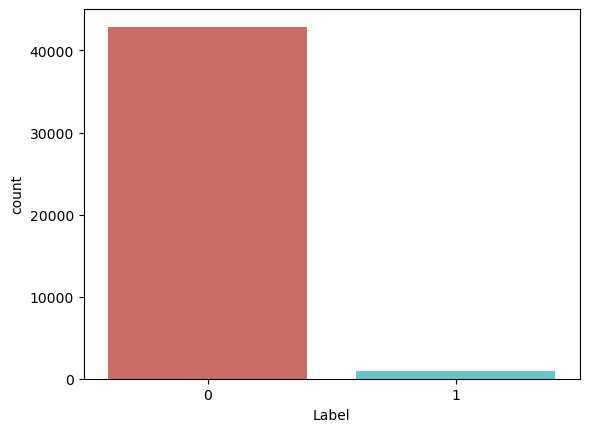

In [12]:
sns.countplot(x='Label',data=data, palette='hls')
plt.show()
#plt.savefig('count_plot') Labeling traffic as normal (0) or malicious (1).

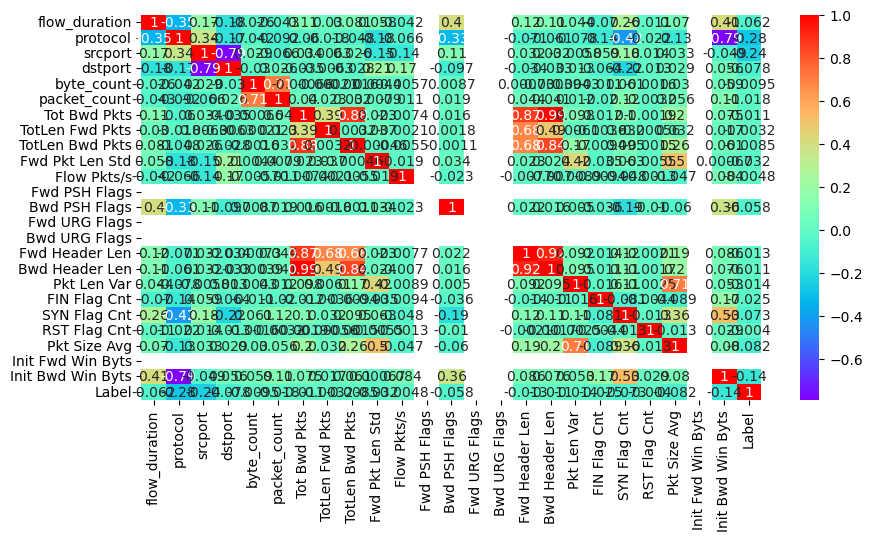

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [14]:
data['Label'].value_counts()

0    42890
1      987
Name: Label, dtype: int64

In [16]:
# Import label encoder
#from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
#data['Label']= label_encoder.fit_transform(data['Label'])

In [17]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

# FS

In [18]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [19]:
selector = SelectPercentile(mutual_info_classif, percentile=15)
X_reduced = selector.fit_transform(X, y)
#X_reduced.shape

In [20]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['protocol', 'srcport', 'dstport', 'Bwd Header Len']

In [21]:
len(selected_columns)

4

In [22]:
df = data[['protocol', 'srcport', 'dstport', 'Bwd Header Len','Label']]

In [23]:
df.columns

Index(['protocol', 'srcport', 'dstport', 'Bwd Header Len', 'Label'], dtype='object')

In [24]:
X = df.drop(["Label"],axis =1)
y = df["Label"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [26]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# BernoulliNB

In [28]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

bnb_acc = accuracy_score(y_pred, y_test)
bnb_prec = precision_score(y_pred, y_test,average='weighted')
bnb_rec = recall_score(y_pred, y_test,average='weighted')
bnb_f1 = f1_score(y_pred, y_test,average='weighted')

In [29]:
storeResults('BernoulliNB',bnb_acc,bnb_prec,bnb_rec,bnb_f1)

# Passive Aggressive

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, 
                                 validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, 
                                 loss='hinge', n_jobs=None, random_state=None, warm_start=False, 
                                 class_weight=None, average=False)

pa.fit(X_train, y_train)

y_pred = pa.predict(X_test)

pa_acc = accuracy_score(y_pred, y_test)
pa_prec = precision_score(y_pred, y_test,average='weighted')
pa_rec = recall_score(y_pred, y_test,average='weighted')
pa_f1 = f1_score(y_pred, y_test,average='weighted')

In [31]:
storeResults('PassiveAggressive',pa_acc,pa_prec,pa_rec,pa_f1)

# SGDClassifier

In [32]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                   max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, 
                   random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, 
                   validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

sgd_acc = accuracy_score(y_pred, y_test)
sgd_prec = precision_score(y_pred, y_test,average='weighted')
sgd_rec = recall_score(y_pred, y_test,average='weighted')
sgd_f1 = f1_score(y_pred, y_test,average='weighted')

In [33]:
storeResults('SGDClassifier',sgd_acc,sgd_prec,sgd_rec,sgd_f1)

# MLP Classifier

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')

In [35]:
storeResults('MLPClassifier',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# Ensemble

In [36]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('BNB', bnb),('PA', pa),('SGD', sgd),('MLP', mlp)], voting='hard')


eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [37]:
storeResults('Ensemble',stac_acc,stac_prec,stac_rec,stac_f1)

# Extension

In [38]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

brf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0,max_samples=1.0,max_features=1.0)

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

ext = VotingClassifier(estimators=[('BoostDT', bdt),('BagRF', brf)], voting='soft')
ext.fit(X_train, y_train)

y_pred    = ext.predict(X_test)

ml_acc = accuracy_score(y_pred, y_test)
ml_prec = precision_score(y_pred, y_test,average='weighted')
ml_rec = recall_score(y_pred, y_test,average='weighted')
ml_f1 = f1_score(y_pred, y_test,average='weighted')

In [39]:
storeResults('Extension',ml_acc,ml_prec,ml_rec,ml_f1)

# Comparison

In [40]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [41]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,BernoulliNB,0.994,0.994,0.994,0.993
1,PassiveAggressive,0.979,1.000,0.979,0.989
2,SGDClassifier,0.994,0.994,0.994,0.993
3,MLPClassifier,0.994,0.994,0.994,0.993
4,Ensemble,0.994,0.994,0.994,0.993
5,Extension,0.994,0.994,0.994,0.993


# Modelling

In [43]:
import joblib
filename = 'models/model_slowratesdn.sav'
joblib.dump(ext, filename)

['models/model_slowratesdn.sav']

# Graph

In [44]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

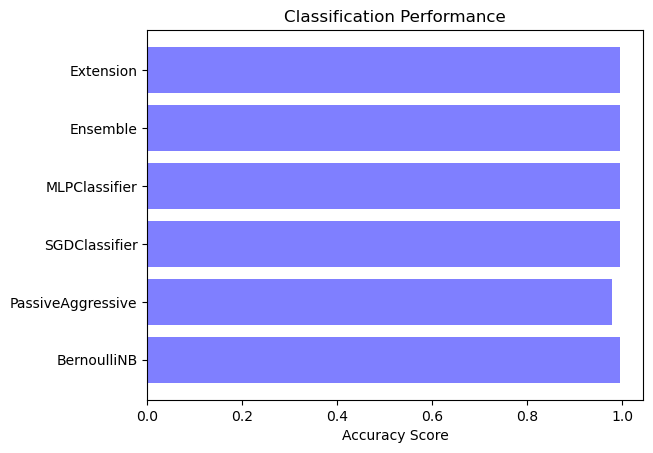

In [45]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

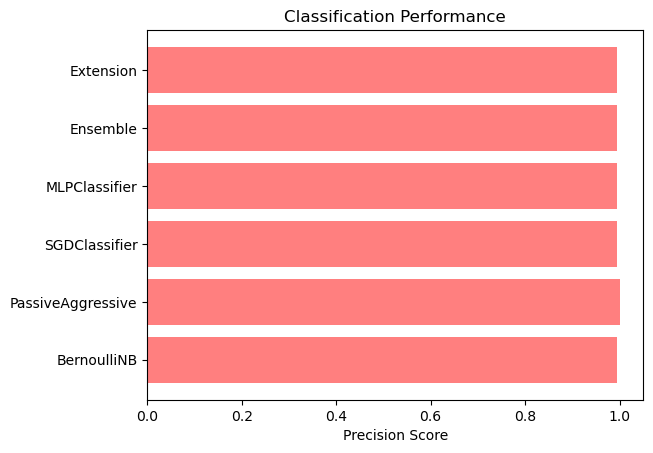

In [46]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

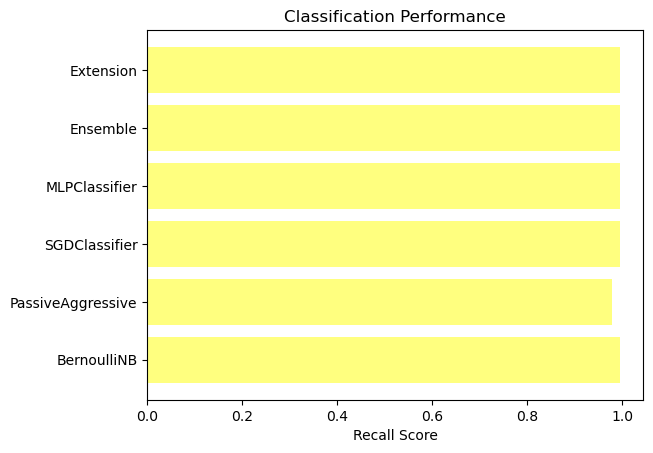

In [47]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

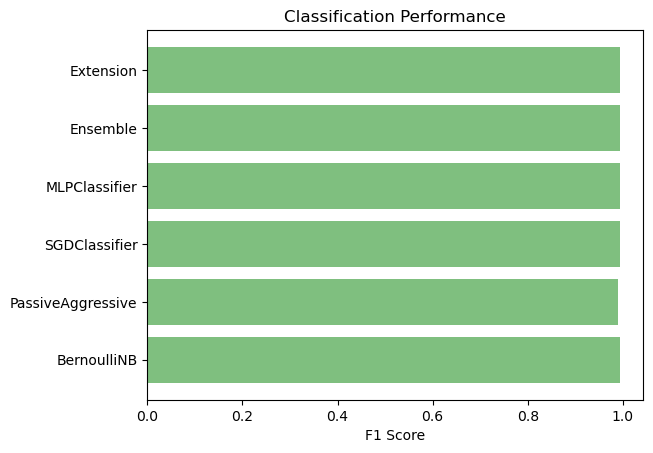

In [48]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()